In [62]:
import cv2

In [63]:
img=cv2.imread('9Q8A0112.JPG')
img

array([[[255, 249, 250],
        [255, 249, 250],
        [255, 249, 250],
        ...,
        [254, 241, 243],
        [254, 241, 243],
        [254, 241, 243]],

       [[255, 249, 250],
        [255, 249, 250],
        [255, 249, 250],
        ...,
        [254, 241, 243],
        [254, 241, 243],
        [254, 241, 243]],

       [[255, 249, 250],
        [255, 249, 250],
        [255, 249, 250],
        ...,
        [254, 241, 243],
        [254, 241, 243],
        [254, 241, 243]],

       ...,

       [[163, 150, 152],
        [163, 150, 152],
        [165, 150, 154],
        ...,
        [208, 214, 179],
        [213, 221, 190],
        [218, 222, 197]],

       [[163, 151, 151],
        [164, 150, 152],
        [164, 150, 152],
        ...,
        [210, 217, 180],
        [215, 224, 191],
        [223, 227, 202]],

       [[163, 151, 151],
        [164, 150, 152],
        [163, 149, 151],
        ...,
        [204, 211, 174],
        [214, 223, 190],
        [235, 239, 214]]

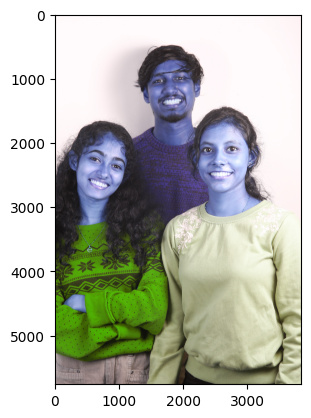

In [64]:
import matplotlib.pyplot as plt
plt.imshow(img)

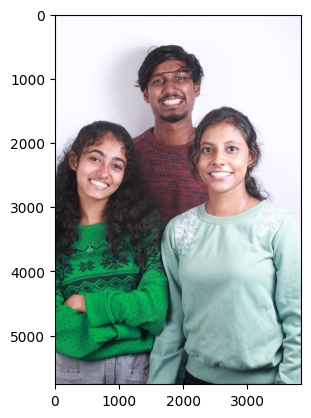

In [65]:
c_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(c_img)

In [66]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade        # assigning to a variable

< cv2.CascadeClassifier 0000017D0C5CBEB0>

In [67]:
img_gray=cv2.cvtColor(c_img,cv2.COLOR_RGB2GRAY)
img_gray     #converting to gray scale to get better result

array([[250, 250, 250, ..., 243, 243, 243],
       [250, 250, 250, ..., 243, 243, 243],
       [250, 250, 250, ..., 243, 243, 243],
       ...,
       [152, 152, 153, ..., 203, 211, 214],
       [152, 152, 152, ..., 205, 213, 219],
       [152, 152, 151, ..., 199, 212, 231]], dtype=uint8)

In [68]:
face=face_cascade.detectMultiScale(img_gray,minNeighbors=25)
face                                        # minNeighbours - to avoid false positives
                                            # face_cascade.detectMultiScale - to detect objects

array([[1331,  681,  936,  936],
       [2099, 1736,  962,  962],
       [ 307, 1930,  935,  935]], dtype=int32)

In [69]:
# [1331,  681,  936,  936]  
# (1331,681) -> top left point of rectangle
# 936 -> width and height of rectangle
# to find bottom right corner point -> (1331+936,681+936)

In [70]:
len(face)

3

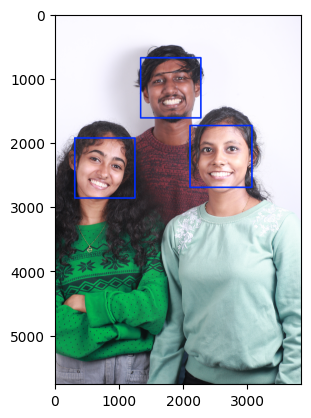

In [71]:
for (x,y,w,h) in face:
    cv2.rectangle(c_img,(x,y),(x+w,y+h),(0,45,3255),23)
plt.imshow(c_img)

In [72]:
#face detection in video

video=cv2.VideoCapture(r'C:\Users\gopik\OneDrive\Documents\Deep-Learning\face_detection\3761461-uhd_3840_2160_25fps.mp4')
while True:
    success,frame=video.read()
    if not success:
        break
    w,h=frame.shape[1],frame.shape[0]
    sf=0.3
    new_w=int(sf*w)
    new_h=int(sf*h)
    frame = cv2.resize(frame,(new_w,new_h))
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    face=face_cascade.detectMultiScale(gray,minNeighbors=6)
    for (x,y,w,h) in face:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,200),3)
    cv2.imshow('Vedio',frame)
    if cv2.waitKey(1)&0XFF==ord('q'):        # ord - ordinal number of q    
        break                                # 0xFF is a hexadecimal number that represents the value 255 in decimal. 
                                             # It is often used to represent the maximum value of an 8-bit number 
video.release()                              # (which can hold values from 0 to 255).
cv2.destroyAllWindows()                      #video.realease() - only for webcam

In [74]:
#face detection using webcam

video=cv2.VideoCapture(0)  # 0 for webcam
while True:
    success,frame=video.read()
    if not success: 
        break
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    face=face_cascade.detectMultiScale(gray,minNeighbors=6)
    for(x,y,w,h) in face:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,200),4)
    cv2.imshow('Webcam',frame)
    if cv2.waitKey(1)&0XFF==ord('q'):
        break
video.release()
cv2.destroyAllWindows()